In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

There are total 6 classes in the dependent column so it's a multiclass classification problem.

In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

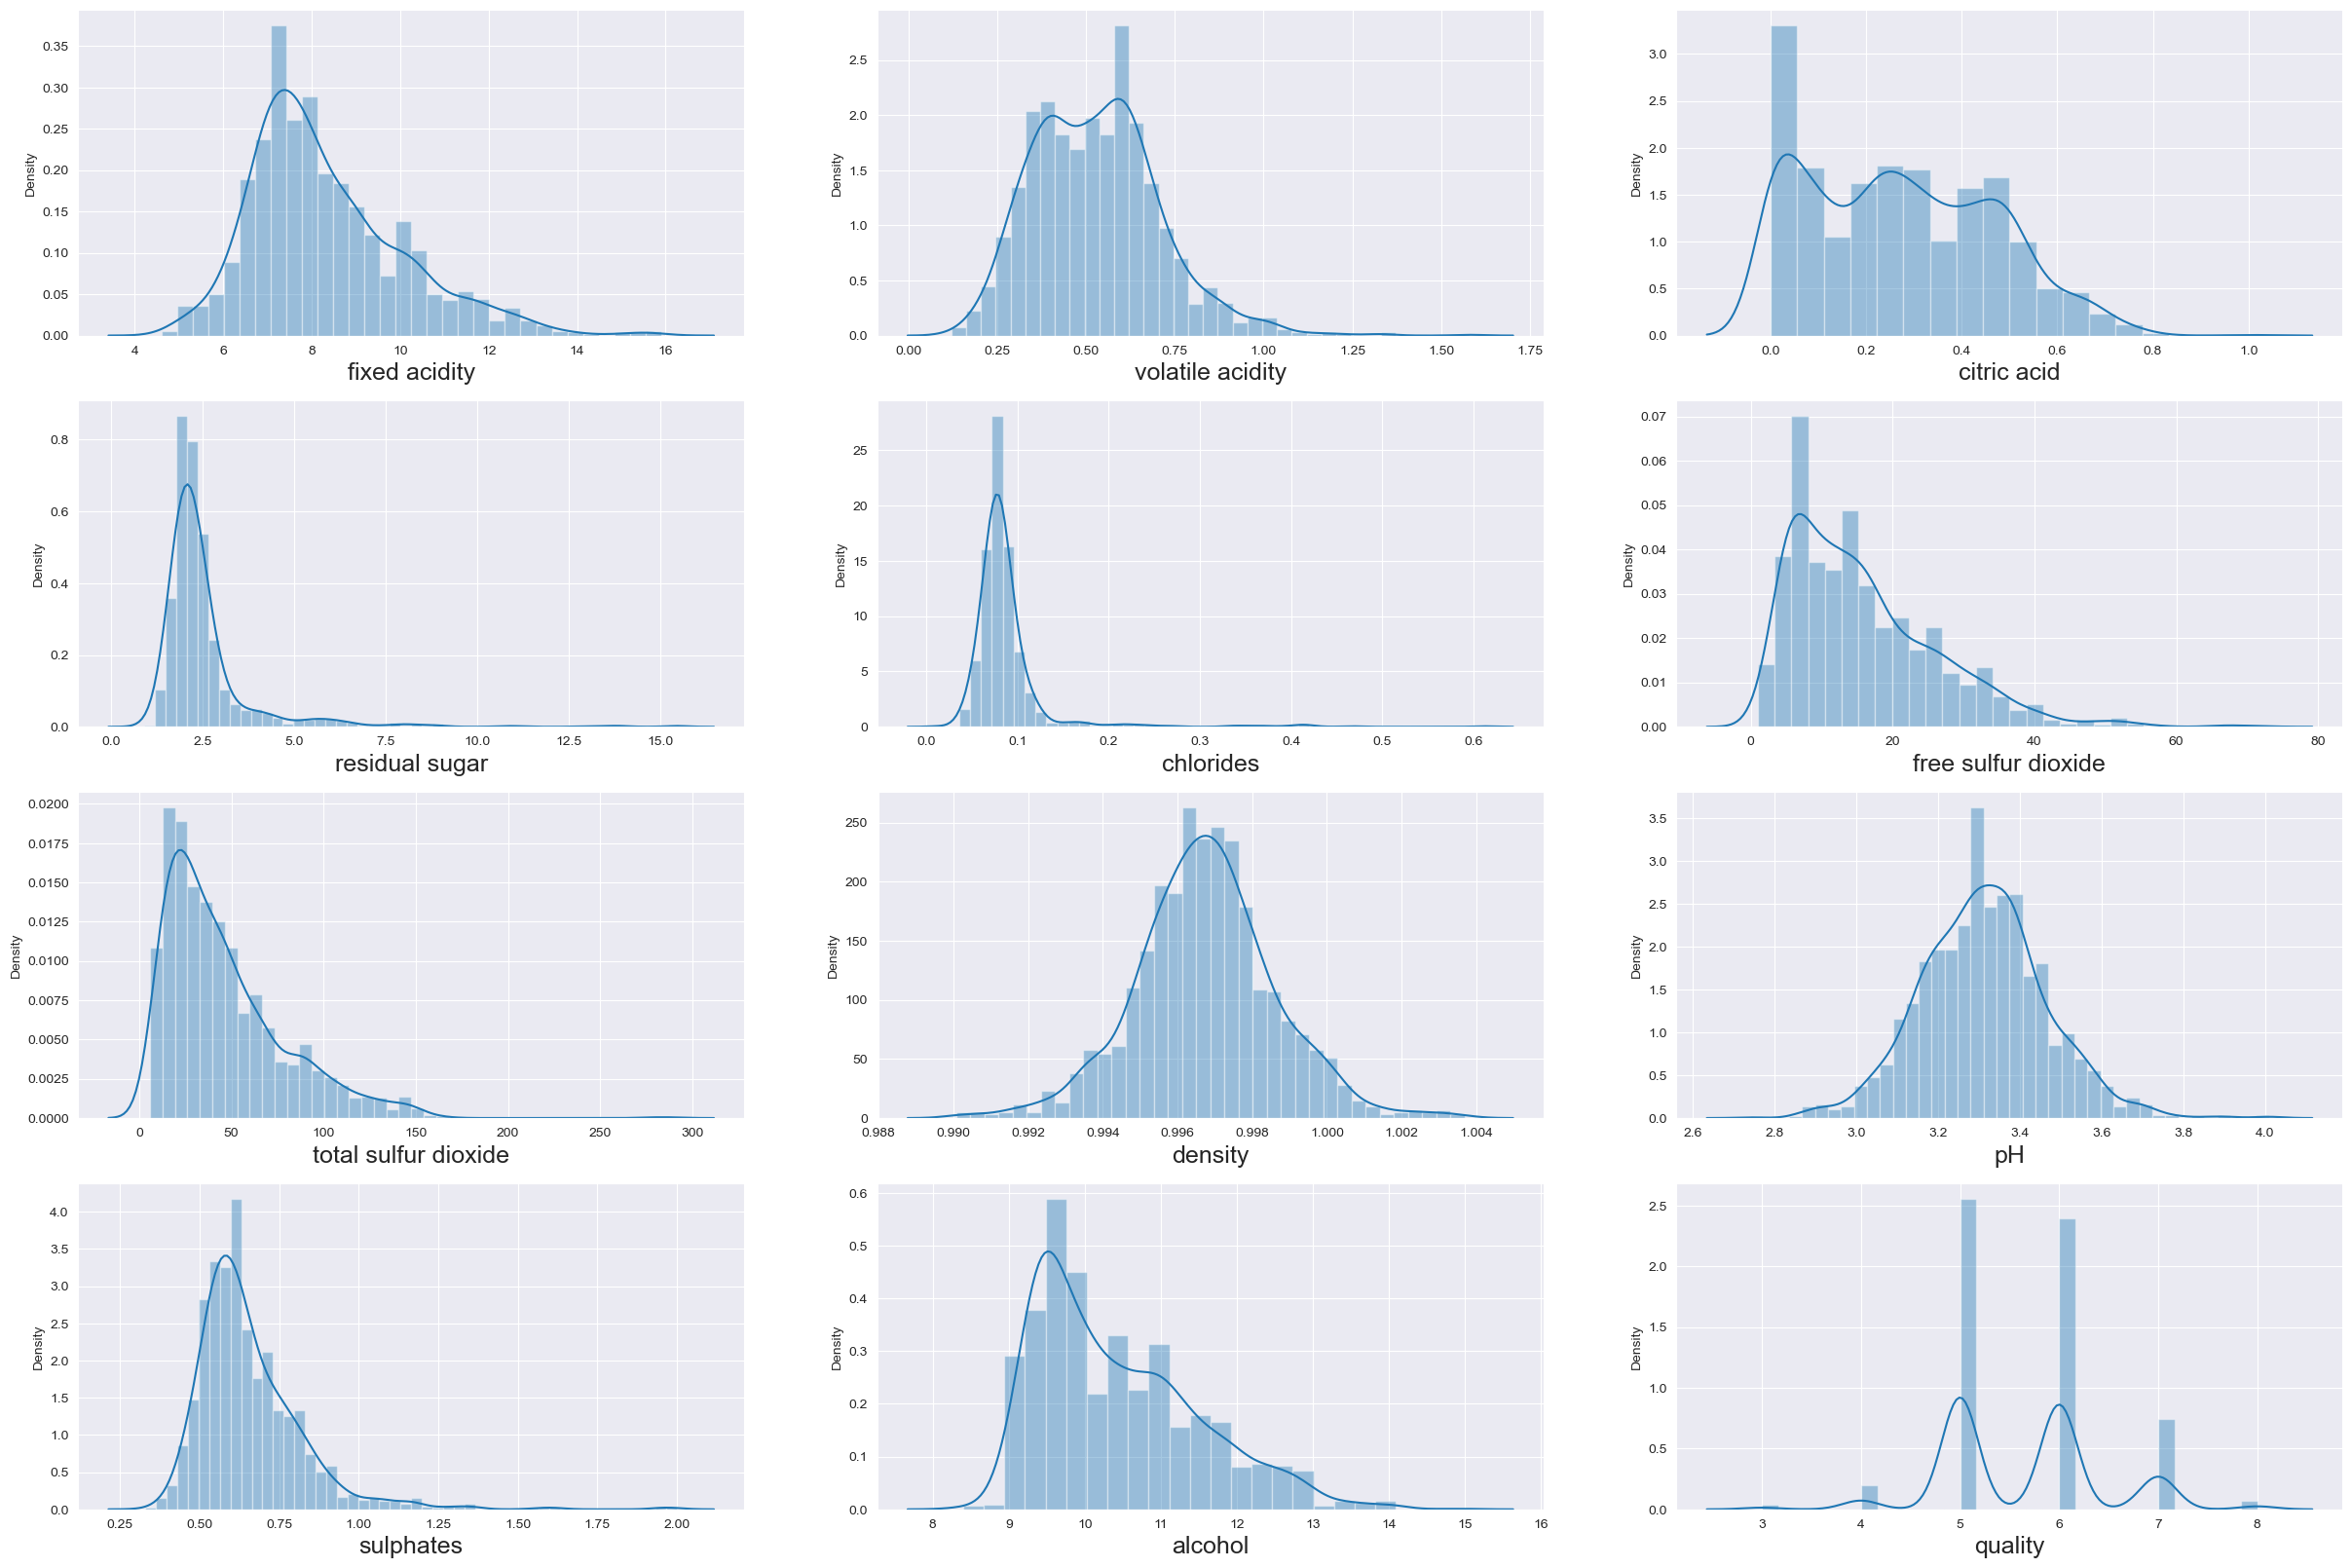

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(30, 20))
graph = 1

for i in data.columns:
    if graph <= len(data.columns):
        ax = plt.subplot(4,3,graph)
        sns.distplot(data[i])
        plt.xlabel(i, fontsize = 18)
    graph += 1
plt.show()

<Axes: >

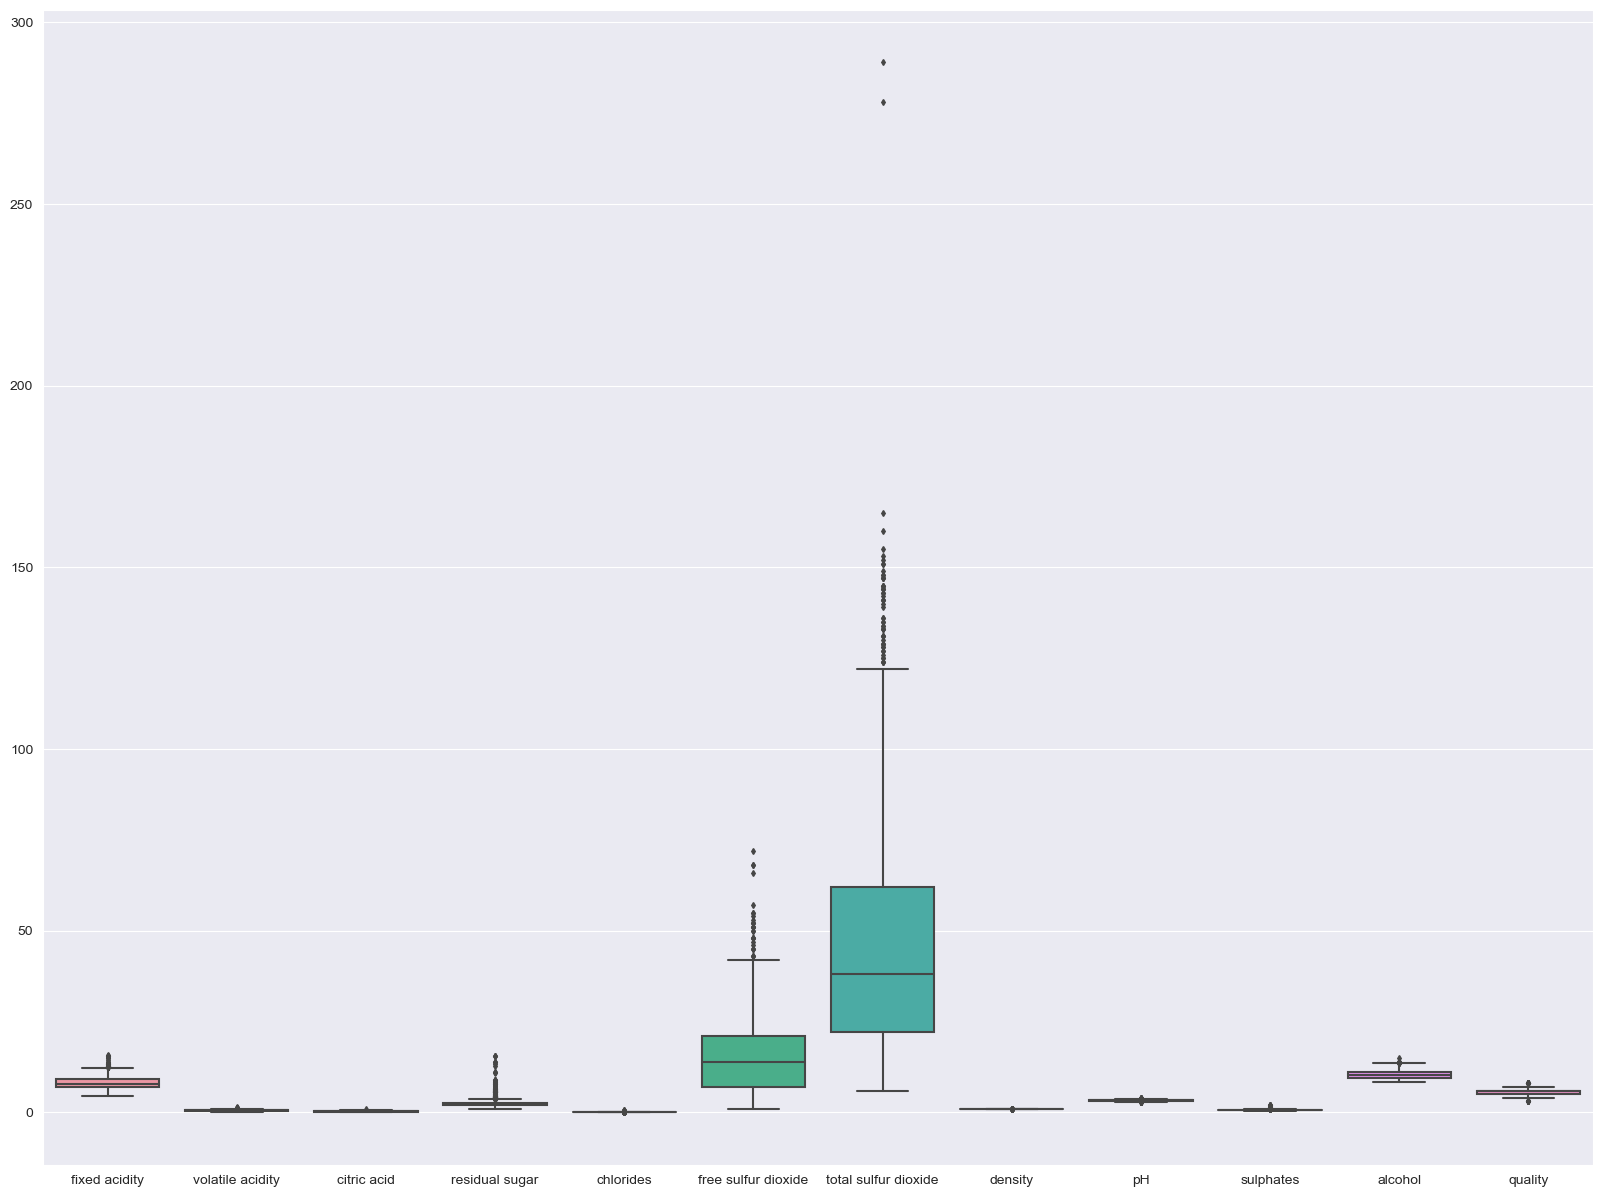

In [19]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(data= data, ax=ax, width=0.8, fliersize=3)

In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(scaler.mean_)

[ 8.35946622  0.52547957  0.27494579  2.56305254  0.08904254 15.95371143
 47.16346956  0.99681127  3.30734779  0.66106756 10.38851821]


In [26]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [38]:
print(f"The training accuracy for SVC is: {round(svc.score(X_train, y_train)*100, 2)}")

The training accuracy is: 67.64


In [30]:
X_test = scaler.transform(X_test)

In [43]:
X_test[0]

array([-0.54866008, -0.31200473,  0.95277345, -0.25489839,  0.48719523,
       -0.85513966, -0.81349559, -0.1802477 ,  0.08306797, -0.17347628,
        0.10608218])

In [46]:
svc.predict([X_test[0]])

array([6], dtype=int64)

In [47]:
y_pred[0]

6

In [32]:
y_pred = svc.predict(X_test)

In [42]:
print(f"The test accuracy for SVC is: {round(accuracy_score(y_test, y_pred)*100, 2)}")

The test accuracy for SVC is: 61.5


### **Logistic regression for multiclass classification**

In [39]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred_logistic = logistic.predict(X_test)

In [41]:
print(f"The test accuracy for logistic regression is: {round(accuracy_score(y_test, y_pred_logistic)*100, 2)}")

The test accuracy for logistic regression is: 56.25


In [48]:
new_data = pd.read_csv(r"https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")
new_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
